In [13]:
import subprocess
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [14]:
def matGen(n, m, m2):

    LONG_LONG_MAX =  9223372036854775807

    #change values here!
    # n = 50
    # m = 50
    # m2 = 50

    #f =  open("Matrix_out.txt")
    mat = np.random.randint(0,1000,size=(n,m))
    print(mat)
    np.savetxt("matrix1.txt",mat,fmt='%i')

    mat2 = np.random.randint(0,1000,size=(m,m2))
    print(mat2)
    np.savetxt("matrix2.txt",mat2,fmt='%i')

    matRes = np.matmul(mat,mat2)
    print(matRes)
    print(matRes.shape)
    np.savetxt("matrixres.txt",matRes,fmt='%i')

In [15]:
subprocess.call(["gcc", "P1.c", "-o","P1.out", "-pthread"])
subprocess.call(["gcc", "P2.c", "-o","P2.out", "-pthread"])
subprocess.call(["gcc", "scheduler.c", "-o","sched.out"])


# subprocess.call("gcc scheduler.c")

f1 = open('datasched.csv', 'w')

writer1 = csv.writer(f1)

header1 = ['dim1', 'dim2', 'dim3', 'TAT(ns)', 'wait(ns)', 'run(ns)', 'switch_ovhd(ns)', 'num_r_P1', 'num_r_P2', 'num_cs']

writer1.writerow(header1)

f1.close()

In [10]:
i = 10
j = 110
k = 760
matGen(i, j, k)
execstring = "./sched.out " + str(i) + " " + str(j) + " " + str(k) + " matrix1.txt matrix2.txt out.txt"
tmp = subprocess.call(execstring.split())

[[ 23 721 662 ... 477 380 768]
 [723 573 411 ... 564 645 517]
 [801  45 363 ... 114 407 705]
 ...
 [ 85  46 276 ... 480 256 719]
 [443 704  87 ... 704 574 196]
 [300 180 310 ... 560 191 557]]
[[321 133 990 ... 727 334 890]
 [166  14 776 ... 278 878 748]
 [741 844 808 ... 691 561 552]
 ...
 [950 198 847 ... 516 288 616]
 [623 727 445 ... 345 565 492]
 [151 656 835 ... 293 971 899]]
[[29224744 27407364 31277173 ... 32240612 30588558 29059851]
 [27912192 28664169 31739450 ... 31520142 30811574 28219469]
 [28054139 27555734 30825411 ... 29568734 29831183 27148608]
 ...
 [23497960 24937689 27060719 ... 27474026 27075190 23818804]
 [28741467 28263376 33269369 ... 31162636 29760559 30054944]
 [26744353 27147249 28264298 ... 28475524 28224239 23354869]]
(10, 760)
P2 ends here
Stopped P1
Stopped P2
Start 1
Stop 1
Start 2
Stop 2
Start 1
Stop 1
Start 2
Stop 2
Start 1
Stop 1
Start 2
Stop 2
Start 1
Stop 1
Start 2
Stop 2
Start 1
Stop 1
Start 2
Stop 2
Start 1
Stop 1
Start 2
Stop 2
Start 1
Stop 1
Star

In [16]:
import time
for i in range(10, 2000, 50):
    # for j in range(10, 1000, 50):
        # for k in range(10, 1000, 50):
    matGen(i, i, i)
    execstring = "./sched.out " + str(i) + " " + str(i) + " " + str(i) + " matrix1.txt matrix2.txt out.txt"
    # tmp = subprocess.check_call(execstring.split())aaaa
    p = subprocess.Popen(execstring.split())
    p.communicate()
    p.wait()
    # time.sleep(2)

[[ 57 273 321 888 185 141  23 594 409 411]
 [131 730  23 132 224  25 575  43 253 297]
 [977 295  47 633 157 973 397 549 759  63]
 [764 962 988 767 361 276 900 576 789 347]
 [171 586 119 999 885 934 336 847 835 691]
 [908 852 810 153 947 621 687 467 745 382]
 [828 863 360 668 520 644 103 576 729 697]
 [810 636 234 486 543 501 282 613 901 976]
 [121 497 362 818  16 685 753 427   9  32]
 [396 806 346 672  87 425 589  80 266 319]]
[[839 244 999 216 183 415 775 885 283 568]
 [ 29 712 839 920 462 431 797 529 971 498]
 [262 870  99  44 364 716 116 896 178 902]
 [276 565 628 230 349 180   0 869 668 693]
 [709 443 776 203 464 581  22 939 230  36]
 [642 472 122 480 306 233 489 832 547 488]
 [419 605 709  71 202  79 875 504 466 937]
 [198 407 428 580 781 831 848 635 327 250]
 [ 10 505 277  33  79 224 883 369 706  27]
 [490 495 693  54 487 170 113 220 252 924]]
[[ 939346 1803444 1704850  968915 1393327 1328249 1303438 2175300 1648495
  1709582]
 [ 745902 1397502 1707367  878892  841618  733512 149

In [ ]:
# for i in range(1, 50):
#     for j in range(1,6):
#         p1 = "./P1.out "+str(n)+" "+str(m)+" "+str(m2)+" "+"matrix1.txt matrix2.txt out.txt "+ str(i) +" 1"
#         tmp=subprocess.call(p1.split()) 
#         print("printing result")
#         #print(tmp)
#         p2 = "./P2.out "+str(n)+" "+str(m)+" "+str(m2)+" "+"matrix1.txt matrix2.txt out.txt 1 "+ str(i)
#         tmp=subprocess.call(p2.split()) 
#         print("printing result")
#         #print(tmp)

# # #dataP1.txt

In [27]:
df1 = pd.read_csv("dataschedtq1.csv")
df2 = pd.read_csv("dataschedtq2.csv")
# df.columns = list(range(1,7))

# df = df.groupby('num_threads').mean('time(ns)')
# df

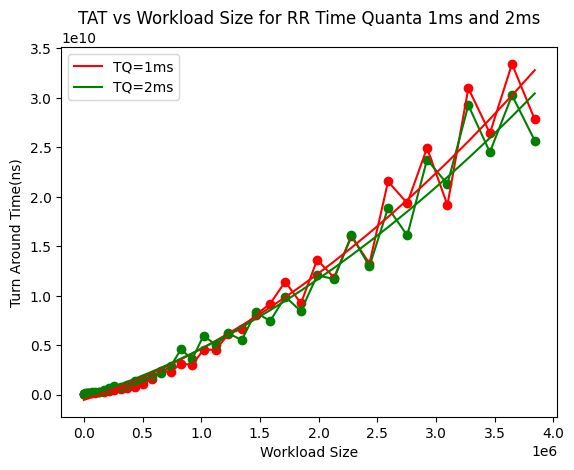

In [46]:
ax = plt.axes()
ax.scatter(df1['dim1'] * df1['dim2'], df1['TAT(ns)'], c = 'r')
ax.scatter(df2['dim1'] * df2['dim2'], df2['TAT(ns)'], c = 'g')
ax.plot(df1['dim1'] * df1['dim2'], df1['TAT(ns)'], c = 'r')
ax.plot(df2['dim1'] * df2['dim2'], df2['TAT(ns)'], c = 'g')

z1 = np.polyfit(df1['dim1'] * df1['dim2'], df1['TAT(ns)'], 2)
p1 = np.poly1d(z1)
ax.plot(df1['dim1'] * df1['dim2'], p1(df1['dim1'] * df1['dim2']), c = 'r', label = 'TQ=1ms')

z2 = np.polyfit(df2['dim1'] * df2['dim2'], df2['TAT(ns)'], 2)
p2 = np.poly1d(z2)
ax.plot(df2['dim1'] * df2['dim2'], p2(df2['dim1'] * df2['dim2']), c = 'g', label = 'TQ=2ms')

ax.set_xlabel('Workload Size')
ax.set_ylabel('Turn Around Time(ns)')
ax.set_title("TAT vs Workload Size for RR Time Quanta 1ms and 2ms")
ax.legend()

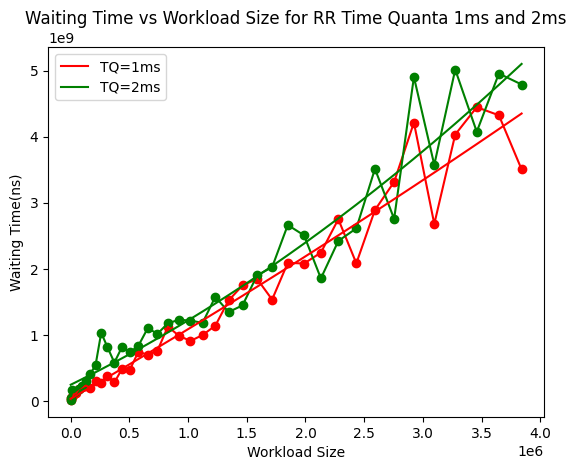

In [47]:
ax = plt.axes()
ax.scatter(df1['dim1'] * df1['dim2'], df1['wait(ns)'], c = 'r')
ax.scatter(df2['dim1'] * df2['dim2'], df2['wait(ns)'], c = 'g')
ax.plot(df1['dim1'] * df1['dim2'], df1['wait(ns)'], c = 'r')
ax.plot(df2['dim1'] * df2['dim2'], df2['wait(ns)'], c = 'g')

z1 = np.polyfit(df1['dim1'] * df1['dim2'], df1['wait(ns)'], 2)
p1 = np.poly1d(z1)
ax.plot(df1['dim1'] * df1['dim2'], p1(df1['dim1'] * df1['dim2']), c = 'r', label = 'TQ=1ms')

z2 = np.polyfit(df2['dim1'] * df2['dim2'], df2['wait(ns)'], 2)
p2 = np.poly1d(z2)
ax.plot(df2['dim1'] * df2['dim2'], p2(df2['dim1'] * df2['dim2']), c = 'g', label = 'TQ=2ms')

ax.set_xlabel('Workload Size')
ax.set_ylabel('Waiting Time(ns)')
ax.set_title("Waiting Time vs Workload Size for RR Time Quanta 1ms and 2ms")
ax.legend()

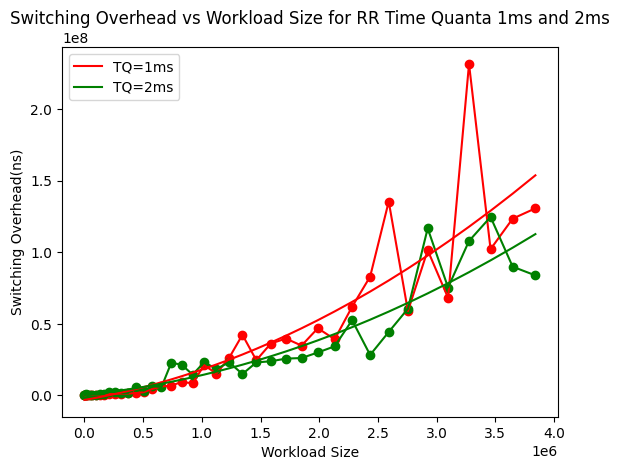

In [48]:
ax = plt.axes()
ax.scatter(df1['dim1'] * df1['dim2'], df1['switch_ovhd(ns)'], c = 'r')
ax.scatter(df2['dim1'] * df2['dim2'], df2['switch_ovhd(ns)'], c = 'g')
ax.plot(df1['dim1'] * df1['dim2'], df1['switch_ovhd(ns)'], c = 'r')
ax.plot(df2['dim1'] * df2['dim2'], df2['switch_ovhd(ns)'], c = 'g')

z1 = np.polyfit(df1['dim1'] * df1['dim2'], df1['switch_ovhd(ns)'], 2)
p1 = np.poly1d(z1)
ax.plot(df1['dim1'] * df1['dim2'], p1(df1['dim1'] * df1['dim2']), c = 'r', label = 'TQ=1ms')

z2 = np.polyfit(df2['dim1'] * df2['dim2'], df2['switch_ovhd(ns)'], 2)
p2 = np.poly1d(z2)
ax.plot(df2['dim1'] * df2['dim2'], p2(df2['dim1'] * df2['dim2']), c = 'g', label = 'TQ=2ms')

ax.set_xlabel('Workload Size')
ax.set_ylabel('Switching Overhead(ns)')
ax.set_title("Switching Overhead vs Workload Size for RR Time Quanta 1ms and 2ms")
ax.legend()